## Exercise 5: Numerics

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

Defining numerical domains

In [2]:
def generate_uniform_grid(mx=5):
    x = np.linspace(0.,1.,mx)
    h = np.array([x[i+1]-x[i] for i in range(len(x)-1)])
    return x,h

def generate_non_uniform_grid(mx=5):
    x=np.linspace(0.,0.2,mx*2)
    y=np.linspace(0.2,1.,mx)
    x=np.append(x[:-1],y)
    h = np.array([x[i+1]-x[i] for i in range(len(x)-1)])
    return x,h

Assembling A and b

In [3]:
def assemble_Ab(x,h,m):
    A = np.zeros((m+2,m+2))
    for i in range(m):
        A[i+1,i+1] += 1./h[i]+1./h[i+1]
        A[i+1,i+2] += -1./(h[i+1])
        A[i+2,i+1] += -1./(h[i+1])
    #The last element has just one cell of support
    A[-1,-1] = 1./h[-1]
    #We impose homogeneous Dirichlet BC on the first element
    #by decoupling it from the rest
    A[0,0] = 1.
    b = np.zeros(m+2)
    for i in range(1,m+1):
        b[i] += (h[i]+h[i-1])/2.
    b[-1] = h[-1]/2.+1. #We impose Neumann BC on the last element
    b[0] = 0.
    return (A,b)

Exact solution

In [4]:
exact_sol = lambda x: -0.5*x**2+2*x
x_fine = np.linspace(0.,1.,1000)
u_exact = exact_sol(x_fine)

### Uniform grid

In [5]:
m = 1 #Assuming m+2 basis functions
x,h = generate_uniform_grid(m+2)
A,b = assemble_Ab(x,h,len(x)-2)
xi = np.linalg.solve(A,b)

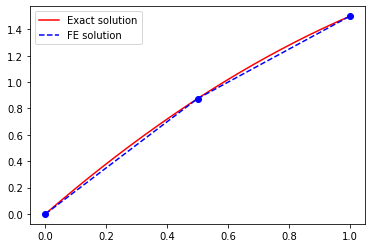

In [6]:
#Since we are using P1 elements we just let 
#the plotting library connect the solution at the
#nodes with straight lines
def plot(x,xi):
    plt.plot(x_fine,u_exact,color='r',label='Exact solution')
    plt.plot(x,xi,'b--',label = 'FE solution')
    plt.plot(x,xi,'bo')
    plt.legend()
    plt.show()
    plt.close()
plot(x,xi)

### Non-uniform grid

Numerical solution at nodes for non-uniform grid

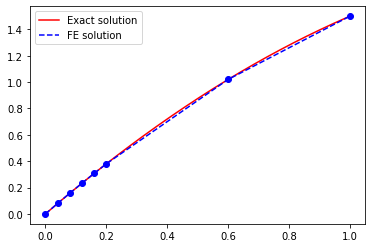

In [7]:
m = 1 #The number of basis functions will depend on the
#computational domain (below)
x,h = generate_non_uniform_grid(m+2)
A,b = assemble_Ab(x,h,len(x)-2)
xi = np.linalg.solve(A,b) #Numerical solution at nodes
plot(x,xi)